In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df_grading = pd.read_excel('./fwdsampledata\\已登錄產品之細項與核准項目 (溫熱型開飲機_ALL)-110_標註顯示欄位.xlsx')
df_label = pd.read_excel('./fwdsampledata\\溫熱型開飲機節能標章產品規格(含108-110年產銷量)_標註必要欄位.xlsx')

In [13]:
pd.merge(df_grading['產品型號'],df_label['型號'], left_on='產品型號',right_on='型號', how='inner').count()

產品型號    56
型號      56
dtype: int64

In [ ]:
df_label.columns

Index(['產品類別', '申請案號', '登錄編號', '登錄年度', '登錄身分', '受委託登錄機構', '標示義務公司', '生產廠場名稱',
       '產品類別.1', '2021產量', '2021銷售量', '產品型號', '銘版產地', '產品能源效率', '產品效率分級',
       '最低能源效率基準', '是否符合最低能源效率基準', '廠牌名稱', '登錄通過日期', '安規試驗單位', '系列型號參照之測試報告型號',
       '額定最大消耗功率(W)', '額定熱水系統消耗功率(W)', '額定保溫加熱器消耗功率(W)', '熱水系統貯水桶容量標示值(L)',
       '熱水系統貯水桶容量實測值(L)', '溫水貯水桶容量標示值(L)', '溫水貯水桶容量實測值(L)', '熱水系統24小時平均水溫(℃)',
       '周圍溫度(℃)', '每24小時備用損失E24(kWh/24小時)標示值', '每24小時備用損失E24(kWh/24小時)實測值',
       '每24小時標準化備用損失Est,24 (kWh/24小時)標示值', '每24小時標準化備用損失Est,24 (kWh/24小時)實測值',
       '每年保溫耗電量', '最低容許耗能基準測試標準及方法', '進口_國產', '失效日期', '失效原因', '檢測報告編號',
       '驗證登錄證書號碼', '申請時間', '收件日期', 'BSMI證書列示國別', 'BSMI證書列示廠址'],
      dtype='object')

In [ ]:
df_grading.columns

Index(['產品類別', '申請案號', '登錄編號', '登錄年度', '登錄身分', '受委託登錄機構', '標示義務公司', '生產廠場名稱',
       '產品類別.1', '2020產量', '2020銷售量', '產品型號', '銘版產地', '產品能源效率', '產品效率分級',
       '最低能源效率基準', '是否符合最低能源效率基準', '廠牌名稱', '登錄通過日期', '安規試驗單位', '系列型號參照之測試報告型號',
       '額定最大消耗功率(W)', '額定熱水系統消耗功率(W)', '額定保溫加熱器消耗功率(W)', '熱水系統貯水桶容量標示值(L)',
       '熱水系統貯水桶容量實測值(L)', '溫水貯水桶容量標示值(L)', '溫水貯水桶容量實測值(L)', '熱水系統24小時平均水溫(℃)',
       '周圍溫度(℃)', '每24小時備用損失E24(kWh/24小時)標示值', '每24小時備用損失E24(kWh/24小時)實測值',
       '每24小時標準化備用損失Est,24 (kWh/24小時)標示值', '每24小時標準化備用損失Est,24 (kWh/24小時)實測值',
       '每年保溫耗電量', '最低容許耗能基準測試標準及方法', '進口_國產', '失效日期', '失效原因', '檢測報告編號',
       '驗證登錄證書號碼', '申請時間', '收件日期', 'BSMI證書列示國別', 'BSMI證書列示廠址'],
      dtype='object')

<Axes: >

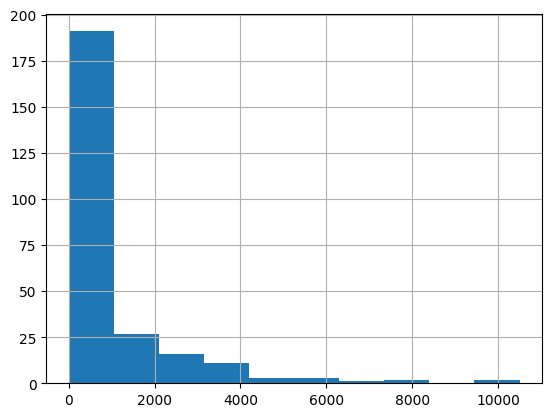

In [ ]:
df_grading['2020產量'].hist()

In [11]:
from dataclasses import dataclass

In [12]:
@dataclass
class Stock:
    ticker: str  # Stock ticker symbol
    exchange: str  # Stock exchange where the stock is traded
    price: float = 0  # Current price of the stock
    currency: str = "USD"  # Currency in which the stock price is denoted
    usd_price: float = 0  # Price of the stock converted to USD

    # Post-initialization method to fetch price information for the stock
    def __post_init__(self):
        # Call the function to retrieve price information
        price_info = get_price_information(self.ticker, self.exchange)

        # Update stock attributes based on the retrieved price information
        if price_info["ticker"] == self.ticker:
            self.price = price_info["price"]
            self.currency = price_info["currency"]
            self.usd_price = price_info["usd_price"]

# Preprocessing

In [ ]:
from datetime import datetime
import uuid

import pandas as pd
import pytz
import ast

from logger import init_log

logger = init_log('EDA')


In [ ]:
def asia_time_zone():
    # Get the current time in UTC
    current_time_utc = datetime.now(pytz.utc)

    # Convert to Asia/Taipei timezone
    time_in_taipei = current_time_utc.astimezone(pytz.timezone('Asia/Taipei'))

    return time_in_taipei

In [14]:
df_grading.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 45 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   產品類別                              283 non-null    object 
 1   申請案號                              284 non-null    object 
 2   登錄編號                              284 non-null    object 
 3   登錄年度                              284 non-null    int64  
 4   登錄身分                              284 non-null    object 
 5   受委託登錄機構                           284 non-null    object 
 6   標示義務公司                            284 non-null    object 
 7   生產廠場名稱                            284 non-null    object 
 8   產品類別.1                            267 non-null    object 
 9   2020產量                            256 non-null    float64
 10  2020銷售量                           256 non-null    float64
 11  產品型號                              284 non-null    object 
 12  銘版產地    

In [28]:
df_grading.dropna(axis=0, thresh=44)

,產品類別,申請案號,登錄編號,登錄年度,登錄身分,受委託登錄機構,標示義務公司,生產廠場名稱,產品類別.1,2020產量,...,最低容許耗能基準測試標準及方法,進口_國產,失效日期,失效原因,檢測報告編號,驗證登錄證書號碼,申請時間,收件日期,BSMI證書列示國別,BSMI證書列示廠址
18,溫熱型開飲機,WD-107N-0009,WD-108-0001,108,委託登錄,昇恆煬國際股份有限公司,晁峰有限公司,摩士智能股份有限公司,溫熱型開飲機,0.0,...,CNS13516,國產、,2021/3/9 上午 12:00:00,廠商來文自願註銷(發文字號：經授能字第11000066000號)註銷日期:110年03月09日,50158005001,NaN,2018/12/25 08:21,2018/12/25 10:42,、,摩士智能股份有限公司_台中市后里區公館里安眉路82-130號、
21,溫熱型開飲機,WD-106N-0048,WD-106-0081,106,自行登錄,元山科技工業股份有限公司,元山科技工業股份有限公司,元久科技工業股份有限公司,溫熱型開飲機,0.0,...,CNS13516,國產、,2021/3/12 上午 12:00:00,廠商來文自願註銷(發文字號：經授能字第11000065180號)註銷日期:110年03月12日,16-10-NEF-073-S、無重出報告,NaN,2017/11/20 14:38,2017/11/20 14:48,中華民國、,元久科技工業股份有限公司_彰化縣和美鎮彰美路三段392號、
27,溫熱型開飲機,WD-106N-0036,WD-106-0059,106,自行登錄,元山科技工業股份有限公司,元山科技工業股份有限公司,元久科技工業股份有限公司,溫熱型開飲機,0.0,...,CNS13516,國產、,2020/6/5 上午 12:00:00,重新申請,17-04-NEF-023-S,NaN,2017/05/08 14:07,2017/05/08 15:50,中華民國、,元久科技工業股份有限公司_彰化縣和美鎮彰美路三段392號、
30,溫熱型開飲機,WD-106N-0026,WD-106-0039,106,委託登錄,捷寶光電股份有限公司,東元電機股份有限公司,&#23791;德電器有限公司,溫熱型開飲機,0.0,...,CNS13516,國產、,2024/6/4 上午 12:00:00,來文自願註銷(發文字號：經授能字第11300123110號)。,1611032-S,NaN,2017/02/08 13:18,2017/02/09 18:21,中華民國、,&amp;#23791;德電器有限公司_台中市后里區太平里四月路65之2號、
32,溫熱型開飲機,WD-106N-0026,WD-106-0040,106,委託登錄,捷寶光電股份有限公司,東元電機股份有限公司,&#23791;德電器有限公司,溫熱型開飲機,0.0,...,CNS13516,國產、,2024/6/4 上午 12:00:00,來文自願註銷(發文字號：經授能字第11300123110號)。,1611049-S,NaN,2017/02/08 13:18,2017/02/09 18:21,中華民國、,&amp;#23791;德電器有限公司_台中市后里區太平里四月路65之2號、
76,溫熱型開飲機,WD-105N-0001,WD-105-0013,105,自行登錄,森泉企業股份有限公司,森泉企業股份有限公司,森泉企業股份有限公司,溫熱型開飲機,2100.0,...,CNS13516,國產、,2021/12/3 上午 12:00:00,重新申請,RL/2016/80041,NaN,2016/08/29 14:54,2016/12/02 14:17,中華民國、,森泉企業股份有限公司_嘉義縣民雄鄉北斗村中興路10號、
77,溫熱型開飲機,WD-105N-0001,WD-105-0012,105,自行登錄,森泉企業股份有限公司,森泉企業股份有限公司,森泉企業股份有限公司,溫熱型開飲機,0.0,...,CNS13516,國產、,2021/12/3 上午 12:00:00,重新申請,RL/2016/80041,NaN,2016/08/29 14:54,2016/12/02 14:17,中華民國、,森泉企業股份有限公司_嘉義縣民雄鄉北斗村中興路10號、
78,溫熱型開飲機,WD-105N-0001,WD-105-0014,105,自行登錄,森泉企業股份有限公司,森泉企業股份有限公司,森泉企業股份有限公司,溫熱型開飲機,1200.0,...,CNS13516,國產、,2021/12/3 上午 12:00:00,重新申請,RL/2016/80041,NaN,2016/08/29 14:54,2016/12/02 14:17,中華民國、,森泉企業股份有限公司_嘉義縣民雄鄉北斗村中興路10號、
79,溫熱型開飲機,WD-105N-0001,WD-105-0018,105,自行登錄,森泉企業股份有限公司,森泉企業股份有限公司,森泉企業股份有限公司,溫熱型開飲機,1800.0,...,CNS13516,國產、,2021/12/3 上午 12:00:00,重新申請,RL/2016/80041,NaN,2016/08/29 14:54,2016/12/02 14:17,中華民國、,森泉企業股份有限公司_嘉義縣民雄鄉北斗村中興路10號、
80,溫熱型開飲機,WD-105N-0001,WD-105-0009,105,自行登錄,森泉企業股份有限公司,森泉企業股份有限公司,森泉企業股份有限公司,溫熱型開飲機,2500.0,...,CNS13516,國產、,2021/12/3 上午 12:00:00,重新申請,RL/2016/80041,NaN,2016/08/29 14:54,2016/12/02 14:17,中華民國、,森泉企業股份有限公司_嘉義縣民雄鄉北斗村中興路10號、


In [30]:
df_grading.dropna(axis=0, thresh=44).loc[[18,21],:].to_excel('test.xlsx',index=False)

In [32]:
import pandas as pd

# Reload Excel after reset
# file_path = "/mnt/data/test.xlsx"
# df = pd.read_excel(file_path, sheet_name="Sheet1")

# Make a copy for normalization
df_norm = df_grading.copy()

# --- Numeric normalization (規格 + 產銷量 + other numeric columns) ---
numeric_cols = [
    "2020產量", "2020銷售量",
    "額定最大消耗功率(W)", "額定熱水系統消耗功率(W)", "額定保溫加熱器消耗功率(W)",
    "熱水系統貯水桶容量標示值(L)", "熱水系統貯水桶容量實測值(L)",
    "溫水貯水桶容量標示值(L)", "溫水貯水桶容量實測值(L)",
    "熱水系統24小時平均水溫(℃)", "周圍溫度(℃)",
    "每24小時備用損失E24(kWh/24小時)標示值", "每24小時備用損失E24(kWh/24小時)實測值",
    "每24小時標準化備用損失Est,24 (kWh/24小時)標示值",
    "每24小時標準化備用損失Est,24 (kWh/24小時)實測值",
    "每年保溫耗電量"
]

for col in numeric_cols:
    if col in df_norm.columns:
        df_norm[col] = pd.to_numeric(df_norm[col], errors="coerce").round(2)

# --- Date normalization ---
date_cols = ["失效日期", "申請時間", "收件日期"]
for col in date_cols:
    if col in df_norm.columns:
        df_norm[col] = pd.to_datetime(df_norm[col], errors="coerce").dt.strftime("%Y-%m-%d")

# --- Category cleanup ---
if "進口_國產" in df_norm.columns:
    df_norm["進口_國產"] = df_norm["進口_國產"].astype(str).str.replace("、", "", regex=False).str.strip()

# Save to Excel with two sheets: Raw vs Normalized
output_path = "./normalized_example.xlsx"
with pd.ExcelWriter(output_path, engine="openpyxl") as writer:
    df_grading.to_excel(writer, sheet_name="Raw Data", index=False)
    df_norm.to_excel(writer, sheet_name="Normalized Data", index=False)

output_path


C:\Users\mark.ding\AppData\Local\Temp\ipykernel_4620\4223656298.py:31: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_norm[col] = pd.to_datetime(df_norm[col], errors="coerce").dt.strftime("%Y-%m-%d")


'./normalized_example.xlsx'

In [31]:
df_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 45 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   申請序號                             57 non-null     object 
 1   標章公司                             57 non-null     object 
 2   合約號                              57 non-null     object 
 3   類別名稱                             57 non-null     object 
 4   型號                               57 non-null     object 
 5   產地                               57 non-null     object 
 6   測試單位                             57 non-null     object 
 7   起約日期                             57 non-null     object 
 8   到約日期                             57 non-null     object 
 9   廠牌名稱                             46 non-null     object 
 10  商驗證編號                            57 non-null     object 
 11  商驗證有效日期                          57 non-null     object 
 12  CCCCode                 

In [49]:
df_norm = df_label.copy()
display(df_norm['是否為測試型號'])


0     NaN
1       否
2       是
3       否
4       否
5       是
6       否
7       否
8       否
9       否
10      否
11      否
12      否
13      是
14      否
15      否
16      否
17      否
18      否
19      否
20      否
21    NaN
22    NaN
23      否
24      否
25      否
26      否
27      否
28      是
29      否
30    NaN
31    NaN
32      否
33      是
34      是
35      否
36      是
37      是
38      是
39      是
40      否
41      是
42    NaN
43    NaN
44      是
45    NaN
46      否
47      否
48      否
49      是
50      否
51      否
52      否
53      否
54      否
55      否
56      是
Name: 是否為測試型號, dtype: object

In [52]:
[col for col in df_label if isinstance(df_label[col][0],float)]

['108產量',
 '108銷售量',
 '109產量',
 '109銷售量',
 '110產量',
 '110銷售量',
 '能效型號',
 '是否為測試型號',
 '寬(mm)',
 '高(mm)',
 '深(mm)',
 '熱水總功率(W)',
 '保溫功率(W)',
 '包裝飲用水專用機',
 '生水容量(L)',
 '實測熱水貯水桶容量(L)',
 '標示熱水貯水桶容量(L)',
 '溫水箱容量(L)',
 '溫水溫度(℃)',
 '熱水溫度(℃)',
 '熱水系統24小時平均水溫(°C)',
 '周圍溫度(°C)',
 '能源因素值EFtest (L/(kWh/day))',
 '能源因素值EFbase(L/(kWh/day))',
 '每24小時備用損失實測值(E24)( kWh)',
 '等效容積換算係數(K)',
 '每24小時標準化備用損失實測值( Est,24) ( kWh)',
 '每24小時標準化備用損失驗算值( Est,24) ( kWh)',
 '每24小時標準化備用損失標示值( Est,24) ( kWh)',
 '溫熱型開飲機節能標章能源耗用基準(E)(kWh/24h)']

In [59]:
import pandas as pd

# Reload Excel after reset
# file_path = "/mnt/data/test.xlsx"
# df = pd.read_excel(file_path, sheet_name="Sheet1")

# Make a copy for normalization
df_norm = df_label.copy()

# --- Numeric normalization (規格 + 產銷量 + other numeric columns) ---
numeric_cols =  ['108產量',
 '108銷售量',
 '109產量',
 '109銷售量',
 '110產量',
 '110銷售量',
 '寬(mm)',
 '高(mm)',
 '深(mm)',
 '熱水總功率(W)',
 '保溫功率(W)',
 '生水容量(L)',
 '實測熱水貯水桶容量(L)',
 '標示熱水貯水桶容量(L)',
 '溫水箱容量(L)',
 '溫水溫度(℃)',
 '熱水溫度(℃)',
 '熱水系統24小時平均水溫(°C)',
 '周圍溫度(°C)',
 '能源因素值EFtest (L/(kWh/day))',
 '能源因素值EFbase(L/(kWh/day))',
 '每24小時備用損失實測值(E24)( kWh)',
 '等效容積換算係數(K)',
 '每24小時標準化備用損失實測值( Est,24) ( kWh)',
 '每24小時標準化備用損失驗算值( Est,24) ( kWh)',
 '每24小時標準化備用損失標示值( Est,24) ( kWh)',
 '溫熱型開飲機節能標章能源耗用基準(E)(kWh/24h)']


for col in numeric_cols:
    if col in df_norm.columns:
        df_norm[col] = pd.to_numeric(df_norm[col], errors="coerce").round(2)

# --- Date normalization ---
date_cols = ["失效日期", "申請時間", "收件日期"]
for col in date_cols:
    if col in df_norm.columns:
        df_norm[col] = pd.to_datetime(df_norm[col], errors="coerce").dt.strftime("%Y-%m-%d")

# --- Category cleanup ---
if "進口_國產" in df_norm.columns:
    df_norm["進口_國產"] = df_norm["進口_國產"].astype(str).str.replace("、", "", regex=False).str.strip()


# Save to Excel with two sheets: Raw vs Normalized
output_path = "./normalized_label_example.xlsx"
with pd.ExcelWriter(output_path, engine="openpyxl") as writer:
    df_label.to_excel(writer, sheet_name="Raw Data", index=False)
    df_norm.to_excel(writer, sheet_name="Normalized Data", index=False)

output_path


'./normalized_label_example.xlsx'

In [37]:
df_norm.columns

Index(['申請序號', '標章公司', '合約號', '類別名稱', '型號', '產地', '測試單位', '起約日期', '到約日期',
       '廠牌名稱', '商驗證編號', '商驗證有效日期', 'CCCCode', '108產量', '108銷售量', '109產量',
       '109銷售量', '110產量', '110銷售量', '測試報告編號', '能效型號', '是否為測試型號',
       '系列型號參照之測試報告型號<br>', '寬(mm)', '高(mm)', '深(mm)', '熱水總功率(W)', '保溫功率(W)',
       '包裝飲用水專用機', '生水容量(L)', '實測熱水貯水桶容量(L)', '標示熱水貯水桶容量(L)', '溫水箱容量(L)',
       '溫水溫度(℃)', '熱水溫度(℃)', '熱水系統24小時平均水溫(°C)', '周圍溫度(°C)',
       '能源因素值EFtest (L/(kWh/day))', '能源因素值EFbase(L/(kWh/day))',
       '每24小時備用損失實測值(E24)( kWh)', '等效容積換算係數(K)',
       '每24小時標準化備用損失實測值( Est,24) ( kWh)', '每24小時標準化備用損失驗算值( Est,24) ( kWh)',
       '每24小時標準化備用損失標示值( Est,24) ( kWh)', '溫熱型開飲機節能標章能源耗用基準(E)(kWh/24h)'],
      dtype='object')